1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


714.0 197.3341272341912


Text(0.5, 1.0, 'Kernel Density Estimate')

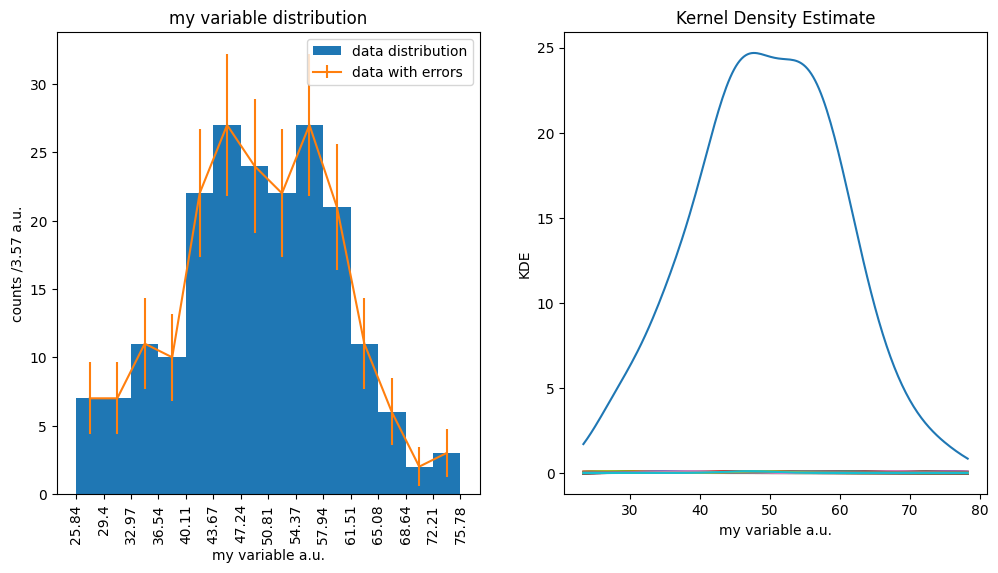

In [81]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy

x = np.random.normal(50,10,200)
fig, ax = plt.subplots(1,2, figsize=(12,6))

# here I plot the left picture
counts, bins, _ = ax[0].hist(x, bins=int(math.sqrt(len(x))), label="data distribution")
ax[0].set_xticks(bins)
ax[0].set_xticklabels(np.array([round(i,2) for i in bins]), rotation='vertical')
ax[0].set_xlabel("my variable a.u.")
bin_width = round(bins[1]-bins[0],2)
y_title = "counts /"+ str(bin_width) + " a.u."
ax[0].set_ylabel(y_title)
ax[0].set_title("my variable distribution")
bin_centers = 0.5 * (bins[1:]+bins[:-1])
errors = np.sqrt(counts)
ax[0].errorbar(bin_centers,counts,yerr=errors, label="data with errors")
ax[0].legend()

# second plot
my_std = 1.06 * x.std() *pow(len(x),-0.2)
x_min, x_max = ax[0].get_xlim()
t = np.linspace(x_min,x_max,200)
gaussians = []
for m in x:
  gaussians.append(norm.pdf(t, loc = m, scale = my_std))

for g in gaussians:
  ax[1].plot(t,g)

# now we sum all the gaussian one over the other
total_gauss = np.zeros(len(x))
for g in gaussians:
  total_gauss = total_gauss + g

# normalization part
tot_g_integral = scipy.integrate.trapz(total_gauss, dx=(t.max() - t.min()) / len(x))

histo_integral = np.sum(counts) * bin_width # number of points * bin width
total_gauss = total_gauss * histo_integral / tot_g_integral

print(histo_integral ,tot_g_integral)

ax[1].plot(t,total_gauss)
ax[1].set_xlabel("my variable a.u.")
ax[1].set_ylabel("KDE")
ax[1].set_title("Kernel Density Estimate")




2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2023-11-30 09:26:29--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2023-11-30 09:26:29--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc585aa8be33bb42ac1d2eddbcba.dl.dropboxusercontent.com/cd/0/inline/CIjpZMiY3TTcGg1_EwWOnKQ0QaupyDKXMYI0XoQ1H3d2aDwSkEYK0zvZKRfkAo0_1gNFT8uC607qAdwBsQNnOPR1wxXKFh18sk8NQ5ht7D5400jfOCnQ3nJzu5k4WB71gpM/file# [following]
--2023-11-30 09:26:29--  https://uc585aa8be33bb42ac1d2eddbcba.dl.dropboxusercontent.com/cd/0/inline/CIjp

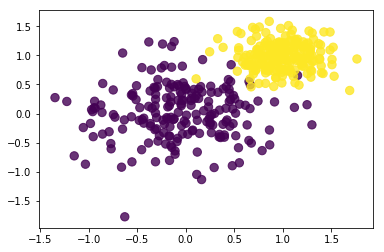

In [24]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot